# This program calculates how pore pressure can induce slip on faults of various orientations considering different S1 azimuth.

This program calculates shear and effective normal stress on fault segments (1-9) and the subsequent Coulomb-Friction-Failure (CFF = shear stress - friction coefficient * effective normal stress). It also displays the calculated results on the Mohr's Coulomb-friction failure envelope. Th eprogram performs a 2-D, simplified version of the analysis in a case study of hydraulic fracturing-induced fault slip in the Sichuan Basin, China (Chen et al., 2018). Please note that a fault is likely to slip if it does not lie below the friction failure line and hence has non-negative CFF value. *Stress regime is Strike-slip and hence S1=SHmax and S3=Shmin*. Required data are the S1 & S3 & pore pressure magnitudes, S1 & fault segments azimuths w.r.t. North and friction coefficient.

In [1]:
# This statement widens the notebook page to the window size.
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

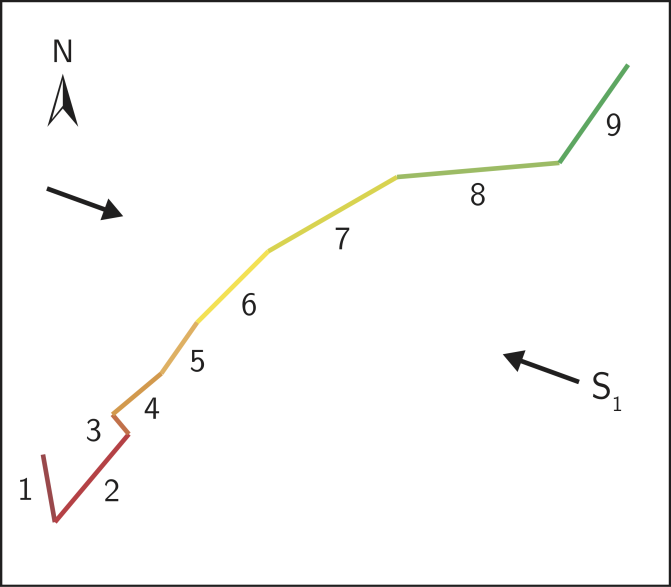

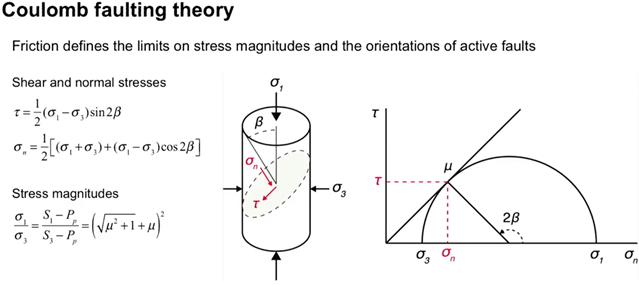

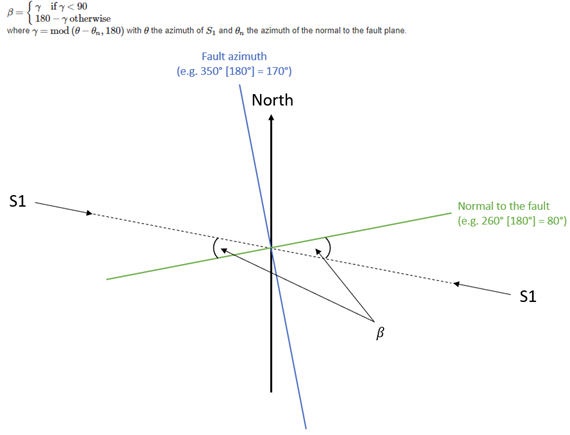

In [1]:
from IPython.display import Image
from IPython.display import display
# Please make sure pictures are in the same dirtectory of the noteook. 
# x resembles the complex fracture divided into 9 segments with the maximum principal stress S1. 
x = Image(filename="fault segments.png", width=500, height=500)
# y is the formula to be used. 
y = Image(filename='Coulomb faulting theory.png', width=500, height=500) 
# z displays the improtant beta angle which is the angle between fault normal and S1 and is smaller than 90 degree. 
z = Image(filename='Beta angle to S1.png', width=500, height=500) 
display(x, y, z)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Enter pricipal stress magnitudes of S1 and S3.
prin_stress_magn_str = input(
    'Please enter S1 and S3 (S1, S3 MPa or psi) and then press enter:\n')

# Enter pore pressure
pore_pr_str = input(
    '\nPlease enter pore pressure without unit but in the same unit as stress magnitudes and then press enter:\n')

# Enter sliding friction coefficient
fric_coeff_str = input(
    '\nPlease enetr the unitless friction of coefficient and then press enter:\n')

Please enter S1 and S3 (S1, S3 MPa or psi) and then press enter:
50, 26.5 MPa

Please enter pore pressure without unit but in the same unit as stress magnitudes and then press enter:
15

Please enetr the unitless friction of coefficient and then press enter:
0.6


In [4]:
# get the pricipal stress magnitudes and unit from the input string by converting string into list

import re
prin_stress_magn_list = [float(s) for s in re.findall(
    r'-?\d+\.?\d*', prin_stress_magn_str)]

# get the pricipal stress magnitude unit from the numbers and unit string
unit = ''.join(x for x in prin_stress_magn_str if x.isalpha())

# Exctract the principal stress magnitudes of S1 & S3 from the list. Please recall this is a Strike-slip Fault stress state; S1=SHmax; S3=Shmin

max_prin_stress = prin_stress_magn_list[0]
min_prin_stress = prin_stress_magn_list[1]

# convert string to float

pore_pr = float(pore_pr_str)
fric_coeff = float(fric_coeff_str)

# Calculation of effctive principal stress magnitudes

sigma1 = max_prin_stress - pore_pr
sigma3 = min_prin_stress - pore_pr

In [5]:
# Enter S1 and fault segments azimuth with respect to north.
# Please make sure data files are in the same dirtectory of the noteook.

S1_azimuth = pd.read_csv(
    'S1 azimuth w.r.t. North.txt', delimiter='\s+', index_col=False)

Faults_azimuth = pd.read_csv(
    'Fault_segments azimuth w.r.t. North.txt', delimiter='\s+', index_col=False)

In [6]:
# Check contents of S1 azimuth w.r.t. North text file
S1_azimuth

,S1_azimuth
0,110
1,20


In [7]:
# Check contents of Fault_segments azimuth w.r.t. North text file
Faults_azimuth

,Fault_segment,Fault_segment_azimuth
0,1,350
1,2,40
2,3,320
3,4,50
4,5,35
5,6,45
6,7,60
7,8,85
8,9,30


In [8]:
# Calculate auxiillary angle landa for different S1 azimuth cases

landa_S1_azimuth_1 = np.abs(
    S1_azimuth.iat[0, 0]-np.mod(Faults_azimuth['Fault_segment_azimuth']+90, 180))
landa_S1_azimuth_2 = np.abs(
    S1_azimuth.iat[1, 0]-np.mod(Faults_azimuth['Fault_segment_azimuth']+90, 180))

# Calculate angle beta from landa in radian for different S1 azimuth cases

beta_S1_azimuth_1 = landa_S1_azimuth_1.map(np.radians).where(
    landa_S1_azimuth_1 < 90, np.pi - landa_S1_azimuth_1.map(np.radians))
beta_S1_azimuth_2 = landa_S1_azimuth_2.map(np.radians).where(
    landa_S1_azimuth_2 < 90, np.pi - landa_S1_azimuth_2.map(np.radians))

In [9]:
# Calculate shear stress on each fault. Recall that pore pressure change deos not affect shear stress.

tau = 0.5 * (sigma1-sigma3) * (2*beta_S1_azimuth_1).map(np.sin)

# Calculate normal effective stress on each fault in each S1 azimuth case

sigma_n_S1_azimuth_1 = 0.5 * \
    ((sigma1+sigma3)+(sigma1-sigma3)*(2*beta_S1_azimuth_1).map(np.cos))
sigma_n_S1_azimuth_2 = 0.5 * \
    ((sigma1+sigma3)+(sigma1-sigma3)*(2*beta_S1_azimuth_2).map(np.cos))

# Calculate CFF for each fault in each S1 azimuth case

CFF_S1_azimuth_1 = tau - fric_coeff * sigma_n_S1_azimuth_1
CFF_S1_azimuth_2 = tau - fric_coeff * sigma_n_S1_azimuth_2

# Calculate pore pressure increase required for mis-oriented faults to slip in each S1 azimuth case

pore_pr_inc_to_slip_S1_azimuth_1 = sigma_n_S1_azimuth_1 - \
    tau / fric_coeff
pore_pr_inc_to_slip_S1_azimuth_2 = sigma_n_S1_azimuth_2 - \
    tau / fric_coeff

# Calculate maximum allowable pore pressure increase. Recall that pore pressure cannot be higher than mimimum lithostatic pressure; S3 in a strike-slip
# stress regime, since the reservoir would undergo hydraulic fracturing before any of the mis-oriented faults would slip

max_allow_pore_pr_inc = min_prin_stress - pore_pr

In [10]:
# Display results for S1 azimuth case 1
results_S1_azimuth_case_1 = pd.DataFrame({'Fault': Faults_azimuth.loc[:, 'Fault_segment'], 'shear stress': tau,
                                          'Effective normal stress': sigma_n_S1_azimuth_1,
                                          'CFF': CFF_S1_azimuth_1, 'pore pressure increase to slip': pore_pr_inc_to_slip_S1_azimuth_1,
                                          'slip practicability; pore pressure to slip less than S3': np.where(pore_pr_inc_to_slip_S1_azimuth_1 >= max_allow_pore_pr_inc, 'No', 'Yes')})

In [11]:
# Highlight faults that can practically slip for S1 azimuth case 1

def highlight_col(x):
    # set by condition
    mask = results_S1_azimuth_case_1['pore pressure increase to slip'].between(
        0, max_allow_pore_pr_inc, inclusive=True)
    x = pd.DataFrame('', index=results_S1_azimuth_case_1.index,
                     columns=results_S1_azimuth_case_1.columns)
    x.loc[mask, ['slip practicability; pore pressure to slip less than S3']
          ] = 'background-color: yellow'
    return x


results_S1_azimuth_case_1.style.apply(highlight_col, axis=None)

,Fault,shear stress,Effective normal stress,CFF,pore pressure increase to slip,slip practicability; pore pressure to slip less than S3
0,1,10.1758,29.125,-7.2992,12.1653,No
1,2,7.55275,32.251,-11.7979,19.6631,No
2,3,10.1758,17.375,-0.249202,0.415336,Yes
3,4,10.1758,29.125,-7.2992,12.1653,No
4,5,5.875,33.4258,-14.1805,23.6341,No
5,6,9.00102,30.8028,-9.48063,15.8011,No
6,7,11.5715,25.2904,-3.60273,6.00455,Yes
7,8,9.00102,15.6972,-0.417325,0.695542,Yes
8,9,4.01874,34.2914,-16.5561,27.5935,No


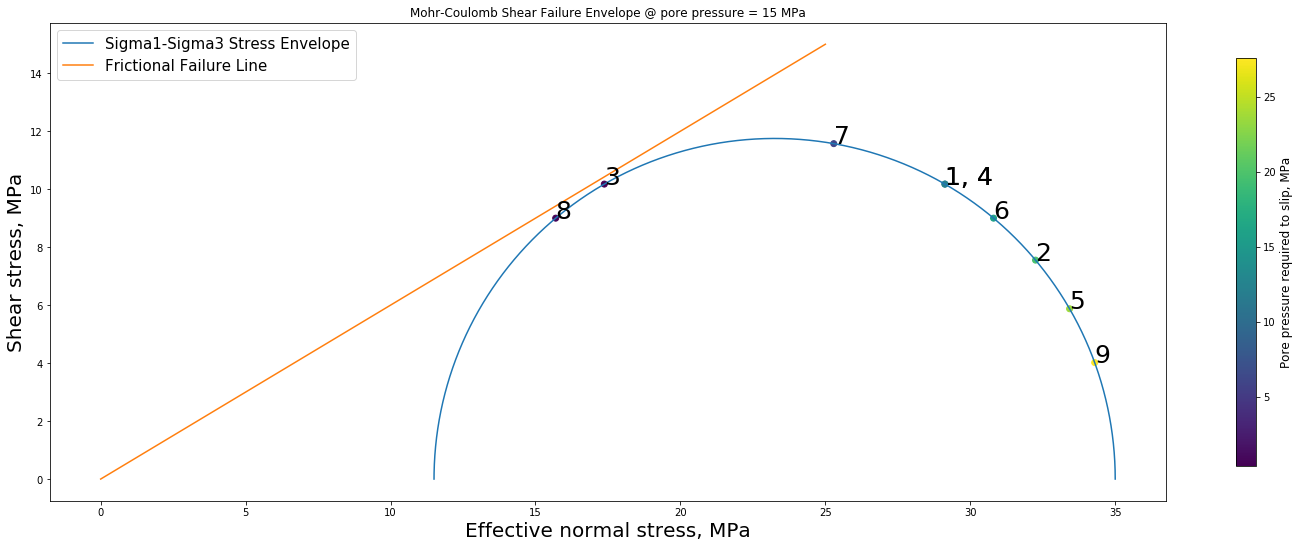

In [12]:
# Data visualization for S1 azimuth case 1
# Plotting shear and effective normal stresses on each fracture onto the Mohr's Coulomb - Shear Failure Envelope
# First, plot the Mohr's Coulomb - Shear Failure Envelope from principal stress magnitudes, pore pressure and friction coefficient

beta = np.linspace(0, np.pi, 360).reshape(360, 1)
# sigma1-sigma3 Stress Envelope

x1 = (sigma1-sigma3)/2 * np.cos(beta) + (sigma1+sigma3)/2
y1 = (sigma1-sigma3)/2 * np.sin(beta)

# Shear Failure Criteria

sigman = np.linspace(0, 25)
fric_fail_line = fric_coeff * sigman

fig, ax = plt.subplots(figsize=(25, 15))
ax.plot(x1, y1, label="Sigma1-Sigma3 Stress Envelope")
ax.plot(sigman, fric_fail_line, label="Frictional Failure Line")
ax.set_aspect('equal')  # same scale for x and y axes
ax.legend(loc=2, fontsize=15)      # upper left corner
ax.set_xlabel('Effective normal stress, ' + unit, fontsize=20)
ax.set_ylabel('Shear stress, ' + unit, fontsize=20)
ax.set_title("Mohr-Coulomb Shear Failure Envelope @ pore pressure = " +
             pore_pr_str + ' ' + unit)
# Plot calculated shear and effective normal stresses on Mohr-Coulomb-friction failure Enevelope

sc = plt.scatter(sigma_n_S1_azimuth_1, tau, c=pore_pr_inc_to_slip_S1_azimuth_1)
cbar = fig.colorbar(sc, shrink=0.5)
cbar.set_label('Pore pressure required to slip, MPa', size=12, rotation=90)

# Labelling fault numbers on the Mohr-Coulomb Shear Failure Envelope
types = ['1, 4', '2', '3', '1, 4', '5', '6', '7', '8', '9']

for i, type in enumerate(types):
    x = sigma_n_S1_azimuth_1.loc[i]
    y = tau.loc[i]
    plt.text(x, y, type, fontsize=25)

In [13]:
# Display results for S1 azimuth case 2
results_S1_azimuth_case_2 = pd.DataFrame({'Fault': Faults_azimuth.loc[:, 'Fault_segment'], 'shear stress': tau,
                                          'Effective normal stress': sigma_n_S1_azimuth_2,
                                          'CFF': CFF_S1_azimuth_2, 'pore pressure increase to slip': pore_pr_inc_to_slip_S1_azimuth_2,
                                          'slip practicability; pore pressure to slip less than S3': np.where(pore_pr_inc_to_slip_S1_azimuth_2 >= max_allow_pore_pr_inc, 'No', 'Yes')})

In [14]:
# Highlight faults that can practically slip for S1 azimuth case 2


def highlight_col(x):
    # set by condition
    mask = results_S1_azimuth_case_2['pore pressure increase to slip'].between(
        0, max_allow_pore_pr_inc, inclusive=True)
    x = pd.DataFrame('', index=results_S1_azimuth_case_2.index,
                     columns=results_S1_azimuth_case_2.columns)
    x.loc[mask, ['slip practicability; pore pressure to slip less than S3']
          ] = 'background-color: yellow'
    return x


results_S1_azimuth_case_2.style.apply(highlight_col, axis=None)

,Fault,shear stress,Effective normal stress,CFF,pore pressure increase to slip,slip practicability; pore pressure to slip less than S3
0,1,10.1758,17.375,-0.249202,0.415336,Yes
1,2,7.55275,14.249,-0.996632,1.66105,Yes
2,3,10.1758,29.125,-7.2992,12.1653,No
3,4,10.1758,17.375,-0.249202,0.415336,Yes
4,5,5.875,13.0742,-1.96952,3.28253,Yes
5,6,9.00102,15.6972,-0.417325,0.695542,Yes
6,7,11.5715,21.2096,-1.15429,1.92382,Yes
7,8,9.00102,30.8028,-9.48063,15.8011,No
8,9,4.01874,12.2086,-3.30643,5.51072,Yes


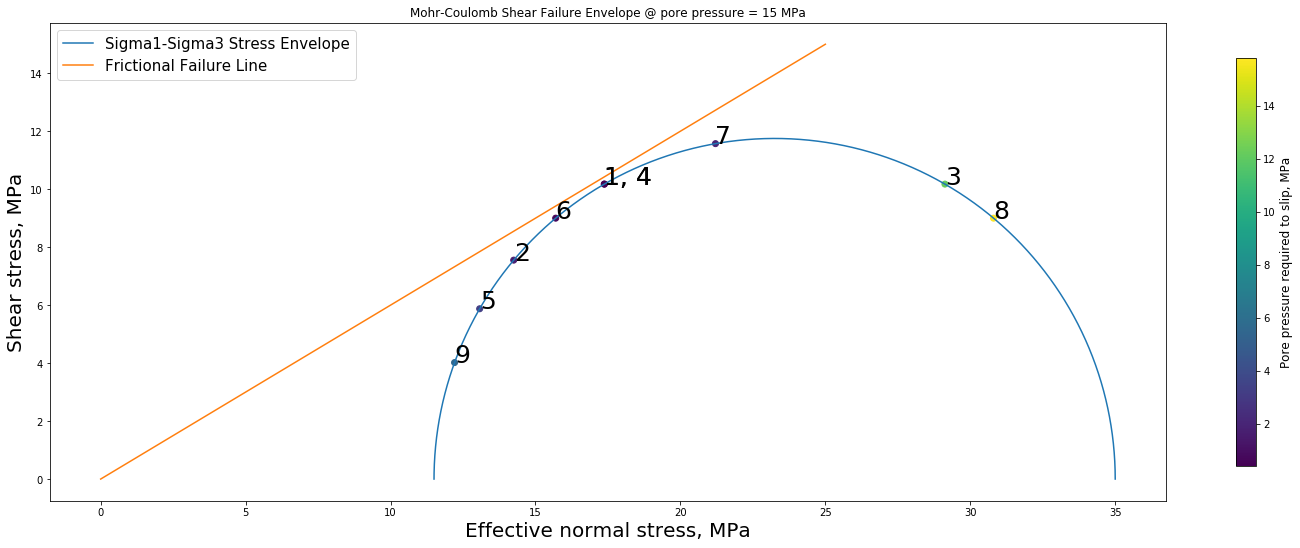

In [15]:
# Data visualization for S1 azimuth case 2
# Plotting shear and effective normal stresses on each fracture onto the Mohr's Coulomb - Shear Failure Envelope
# First, plot the Mohr's Coulomb - Shear Failure Envelope from principal stress magnitudes, pore pressure and friction coefficient

beta = np.linspace(0, np.pi, 360).reshape(360, 1)
# sigma1-sigma3 Stress Envelope

x1 = (sigma1-sigma3)/2 * np.cos(beta) + (sigma1+sigma3)/2
y1 = (sigma1-sigma3)/2 * np.sin(beta)

# Shear Failure Criteria

sigman = np.linspace(0, 25)
fric_fail_line = fric_coeff * sigman

fig, ax = plt.subplots(figsize=(25, 15))
ax.plot(x1, y1, label="Sigma1-Sigma3 Stress Envelope")
ax.plot(sigman, fric_fail_line, label="Frictional Failure Line")
ax.set_aspect('equal')  # same scale for x and y axes
ax.legend(loc=2, fontsize=15)      # upper left corner
ax.set_xlabel('Effective normal stress, ' + unit, fontsize=20)
ax.set_ylabel('Shear stress, ' + unit, fontsize=20)
ax.set_title("Mohr-Coulomb Shear Failure Envelope @ pore pressure = " +
             pore_pr_str + ' ' + unit)

# Plot calculated shear and effective normal stresses on Mohr-Coulomb-friction failure Enevelope

sc = plt.scatter(sigma_n_S1_azimuth_2, tau, c=pore_pr_inc_to_slip_S1_azimuth_2)
cbar = fig.colorbar(sc, shrink=0.5)
cbar.set_label('Pore pressure required to slip, MPa', size=12, rotation=90)

# Labelling fault numbers on the Mohr-Coulomb Shear Failure Envelope
types = ['1, 4', '2', '3', '1, 4', '5', '6', '7', '8', '9']

for i, type in enumerate(types):
    x = sigma_n_S1_azimuth_2.loc[i]
    y = tau.loc[i]
    plt.text(x, y, type, fontsize=25)